In [2]:
import json
import pandas as pd

In [6]:


# Step 1: Load JSON data from the file
with open('out23/configs.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    values = row_data[0] + list ( row_data[1].values() ) + list( row_data[2].values() )
    rows.append(values)

# # Step 3: Create a DataFrame
configs = pd.DataFrame(rows, columns=['i', 'j', 'k']+list ( row_data[1].keys() ) + list( row_data[2].keys() ))


In [7]:
configs.head()

,i,j,k,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,model_based_pick
0,0,0,0,1,3,16,5,5,0.001592,128,64,32,256,128,0.008025,0.009081,False
1,0,0,1,4,6,16,7,1,0.002172,128,128,256,256,8,0.011380,0.000039,False
2,0,0,2,5,5,8,7,5,0.059588,256,8,64,64,128,0.003641,0.003510,False
3,1,0,0,8,5,16,5,1,0.013902,128,32,128,256,128,0.175778,0.002875,False
4,1,0,1,1,4,16,1,5,0.003865,256,128,32,256,8,0.001903,0.000119,False


In [8]:
configs.shape

(77, 17)

---

In [9]:
import pandas as pd
import json

# Step 1: Load JSON data from the file
with open('out23/results.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    
    if row_data[3] != None:
        values = row_data[0] + [round(row_data[1],2)] + \
                                list(row_data[2].values()) + \
                                 [row_data[3]['loss']] + \
                                row_data[3]['info']['test accuracy'] + \
                                row_data[3]['info']['validation accuracy'] +\
                                 row_data[3]['info']['train accuracy'] 
    # except TypeError or SyntaxError:
    #     pass
        rows.append(values)

# # Step 3: Create a DataFrame
# try:
loss_list = ['loss','gravity_loss', 'c_o_ratio_loss', 'metallicity_loss', 'temperature_loss', 'gravity_mae', 'c_o_ratio_mae', 'metallicity_mae', 'temperature_mae']


results = pd.DataFrame(rows, columns=['i', 'j', 'k', 'iteration']+
                                       list(row_data[2].keys())+['loss']+
                                       ['test_'+elem for elem in loss_list]+
                                       ['val_'+elem for elem in loss_list]+
                                       ['train_'+elem for elem in loss_list])

In [10]:
results.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,val_temperature_mae,train_loss,train_gravity_loss,train_c_o_ratio_loss,train_metallicity_loss,train_temperature_loss,train_gravity_mae,train_c_o_ratio_mae,train_metallicity_mae,train_temperature_mae
0,6,0,2,16.67,1.686953e+09,1.686953e+09,1.686981e+09,0.202785,0.206551,0.079746,...,0.049265,0.199846,0.076490,0.051475,0.069666,0.002214,0.294103,0.237924,0.298750,0.049657
1,8,0,2,16.67,1.686953e+09,1.686953e+09,1.686982e+09,1.055205,1.063671,0.366228,...,0.250963,1.057085,0.358662,0.386566,0.253188,0.058668,0.742022,0.782041,0.603203,0.252380
2,10,0,2,16.67,1.686953e+09,1.686953e+09,1.686986e+09,0.159414,0.165149,0.057269,...,0.054599,0.158810,0.052106,0.041334,0.062848,0.002521,0.237766,0.212490,0.282563,0.052218
3,4,0,0,16.67,1.686953e+09,1.686953e+09,1.687005e+09,0.106336,0.109424,0.030613,...,0.053639,0.107650,0.027484,0.022959,0.054651,0.002556,0.161020,0.150533,0.259705,0.053742
4,10,0,0,16.67,1.686953e+09,1.686953e+09,1.687005e+09,0.096056,0.100998,0.027260,...,0.048910,0.098349,0.025040,0.021773,0.049459,0.002078,0.152715,0.149485,0.242916,0.048537


In [11]:
results.shape

(51, 35)

In [12]:
# results.iloc[0]

In [13]:

# Concatenate DataFrames based on the first column (ID)
merged_df = pd.merge(results, configs, on=['i','j','k'])

# Print the concatenated DataFrame
merged_df.sort_values(by='loss', inplace=True)


In [14]:
merged_df.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,model_based_pick
30,16,0,0,16.67,1.686981e+09,1.686981e+09,1.687076e+09,0.068985,0.070802,0.013205,...,2,0.001950,64,64,256,64,16,0.008900,0.000232,False
50,13,0,0,50.00,1.686953e+09,1.686953e+09,1.687178e+09,0.069129,0.071345,0.015897,...,2,0.024798,128,8,8,256,32,0.066788,0.000331,False
35,6,0,1,16.67,1.686953e+09,1.686953e+09,1.687109e+09,0.069464,0.071635,0.015900,...,4,0.005212,64,32,32,256,32,0.011346,0.001235,False
34,7,0,0,50.00,1.686953e+09,1.686953e+09,1.687095e+09,0.074351,0.075855,0.016842,...,3,0.004482,64,16,32,16,128,0.003397,0.000202,False
31,2,0,1,16.67,1.686953e+09,1.686953e+09,1.687080e+09,0.078598,0.079647,0.016749,...,1,0.012618,32,8,128,128,128,0.181591,0.000389,False


In [15]:
merged_df.sort_values(by='submitted').head(20)

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,model_based_pick
24,0,0,0,16.67,1.686953e+09,1.686953e+09,1.687053e+09,0.150858,0.158297,0.042293,...,5,0.001592,128,64,32,256,128,0.008025,0.009081,False
28,0,0,1,16.67,1.686953e+09,1.686953e+09,1.687070e+09,0.093017,0.094424,0.021519,...,1,0.002172,128,128,256,256,8,0.011380,0.000039,False
21,0,0,2,16.67,1.686953e+09,1.686953e+09,1.687050e+09,0.195471,0.196873,0.061925,...,5,0.059588,256,8,64,64,128,0.003641,0.003510,False
5,2,0,0,16.67,1.686953e+09,1.686953e+09,1.687005e+09,0.463446,0.472326,0.243297,...,2,0.002216,16,256,32,16,8,0.143871,0.000026,False
31,2,0,1,16.67,1.686953e+09,1.686953e+09,1.687080e+09,0.078598,0.079647,0.016749,...,1,0.012618,32,8,128,128,128,0.181591,0.000389,False
7,2,0,2,16.67,1.686953e+09,1.686953e+09,1.687013e+09,0.130205,0.134662,0.040636,...,5,0.001950,128,256,256,32,128,0.218856,0.000022,False
32,3,0,0,50.00,1.686953e+09,1.686953e+09,1.687085e+09,1.207969,1.221231,0.382535,...,4,0.212393,16,8,32,16,256,0.078459,0.000014,False
3,4,0,0,16.67,1.686953e+09,1.686953e+09,1.687005e+09,0.106336,0.109424,0.030613,...,1,0.028598,128,32,128,16,8,0.095242,0.000059,False
23,4,0,1,16.67,1.686953e+09,1.686953e+09,1.687051e+09,0.369657,0.387225,0.156358,...,2,0.112665,32,8,256,64,32,0.220454,0.007395,False
10,4,0,2,16.67,1.686953e+09,1.686953e+09,1.687023e+09,0.088287,0.092068,0.022866,...,2,0.006905,8,128,128,32,64,0.054740,0.000679,False


In [41]:
def plot_CumulativeBudget_loss(loss_df_list,
                              print_results = True,
                              plot_results = True,
                              ):
    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                print(smallest_value)
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)



        if print_results:
            print( budget_list, list_loss_smaller)



        if plot_results:
            import seaborn as sns
            import matplotlib.pyplot as plt

            sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": "-"})
            sns.scatterplot(x=budget_list, y=list_loss_smaller, marker='s', s=50, alpha=0.9)
            plt.plot(budget_list, list_loss_smaller, '--', alpha=0.5)
            plt.xlabel('Cumulative Budget', fontsize=12)
            plt.ylabel('Validation Huber Loss', fontsize=12)

            sns.set(style="ticks")
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim((10, 10000))
            plt.ylim((0.04, .6))
            plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray')
            plt.grid(True, which='major', axis='both', linestyle='-', linewidth=1, color='darkgrey')

            # Set custom y-axis ticks
            yticks = [0.05, 0.1, 0.5,]
            plt.yticks(yticks, [str(tick) for tick in yticks])
    plt.legend()

    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.20278503000736237
0.15941353142261505
0.10633581131696701
0.09605561196804047
0.09493011981248856
0.08828707039356232
0.08776610344648361
0.0689845159649849


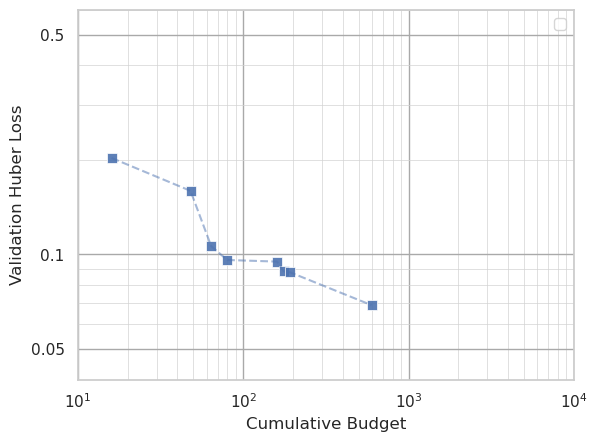

In [42]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

In [36]:
merged_df.iloc[0]

i                                        16
j                                         0
k                                         0
iteration                             16.67
submitted                 1686980762.592156
started                   1686980762.592244
finished                  1687076361.954839
loss                               0.068985
test_loss                          0.070802
test_gravity_loss                  0.013205
test_c_o_ratio_loss                0.013092
test_metallicity_loss              0.043549
test_temperature_loss              0.000956
test_gravity_mae                   0.089548
test_c_o_ratio_mae                 0.105624
test_metallicity_mae               0.218105
test_temperature_mae               0.033265
val_loss                           0.068985
val_gravity_loss                   0.010193
val_c_o_ratio_loss                 0.014119
val_metallicity_loss               0.043708
val_temperature_loss               0.000964
val_gravity_mae                 

In [19]:
dict(merged_df.iloc[0, 35:-1])

{'Conv__MaxPooling1D': 1,
 'Conv__NumberLayers': 3,
 'Conv__filters': 32,
 'Conv__kernel_size': 6,
 'FC__NumberLayers': 2,
 'FC__dropout': 0.0019496598438862324,
 'FC__units': 64,
 'FC__units_c_o_ratio': 64,
 'FC__units_gravity': 256,
 'FC__units_metallicity': 64,
 'FC__units_temperature': 16,
 'FC_out_dropout': 0.008899612197034446,
 'lr': 0.00023214415448025914}

In [20]:
merged_df.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberLayers', 'Conv__filters',
       'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout', 'FC__units',
       'FC__units_c_o_ratio', 'FC__units_gravity', 'FC__units_metallicity',
       'FC__units_temperature', 'FC_out_dropout

In [21]:
merged_df2 = merged_df [ merged_df['loss'] < 1 ]

In [22]:
merged_df2.shape

(43, 49)

In [23]:
merged_df2.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberLayers', 'Conv__filters',
       'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout', 'FC__units',
       'FC__units_c_o_ratio', 'FC__units_gravity', 'FC__units_metallicity',
       'FC__units_temperature', 'FC_out_dropout

In [28]:
data = merged_df[[
             'Conv__MaxPooling1D',
             # 'Conv__NumberBlocks',
             'Conv__NumberLayers',
             'Conv__filters',
             'Conv__kernel_size',
             'FC__NumberLayers',
             'FC__dropout',
             'FC__units',
             'FC__units_c_o_ratio',
             'FC__units_gravity',
             'FC__units_metallicity',
             'FC__units_temperature',
             # 'FC_in_Conv__dropout',
             # 'FC_in_Conv__units',
             'FC_out_dropout',
             'lr',
             'val_loss']
            ]

data.head()

,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,val_loss
30,1,3,32,6,2,0.001950,64,64,256,64,16,0.008900,0.000232,0.068985
50,8,4,8,7,2,0.024798,128,8,8,256,32,0.066788,0.000331,0.069129
35,3,6,32,3,4,0.005212,64,32,32,256,32,0.011346,0.001235,0.069464
34,5,2,8,3,3,0.004482,64,16,32,16,128,0.003397,0.000202,0.074351
31,5,6,32,3,1,0.012618,32,8,128,128,128,0.181591,0.000389,0.078598


In [29]:
dict(merged_df2.sort_values('val_loss').iloc[0, 35:-1])

{'Conv__MaxPooling1D': 1,
 'Conv__NumberLayers': 3,
 'Conv__filters': 32,
 'Conv__kernel_size': 6,
 'FC__NumberLayers': 2,
 'FC__dropout': 0.0019496598438862324,
 'FC__units': 64,
 'FC__units_c_o_ratio': 64,
 'FC__units_gravity': 256,
 'FC__units_metallicity': 64,
 'FC__units_temperature': 16,
 'FC_out_dropout': 0.008899612197034446,
 'lr': 0.00023214415448025914}

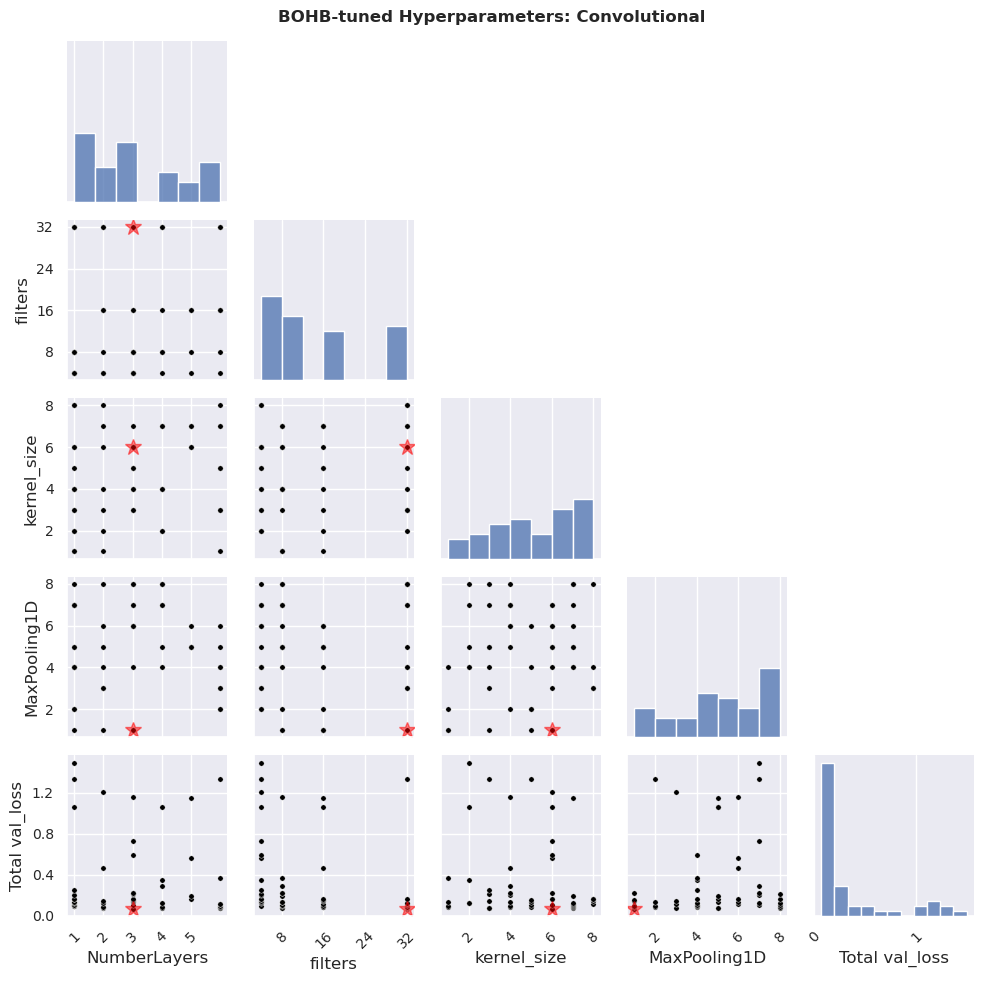

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, LogLocator

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
    # 'Conv__NumberBlocks',
                  'Conv__NumberLayers',
                  'Conv__filters',
                  'Conv__kernel_size',
                  'Conv__MaxPooling1D',
                  'val_loss']]

# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
labels = [
    # 'NumberBlocks',
          'NumberLayers',
          'filters',
          'kernel_size',
          'MaxPooling1D',
          'Total val_loss']

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=12)
    g.axes[i, 0].set_ylabel(label, fontsize=12)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in [ 'NumberLayers']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))
        # elif i == 0 and j==5:
        #     # Set logarithmic scale for the diagonal subplots
        #     g.axes[i, j].xaxis.set_major_locator(LogLocator(base=10))
        #     g.axes[i, j].xaxis.set_minor_locator(LogLocator(base=10, subs=[0.02,0.05,0.01, 0.5, 1.], numticks=10))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=12, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Convolutional", fontweight='bold', fontsize=12)

# Set the size of the figure to 10 inches by 10 inches
g.fig.set_size_inches(10, 10)

# plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


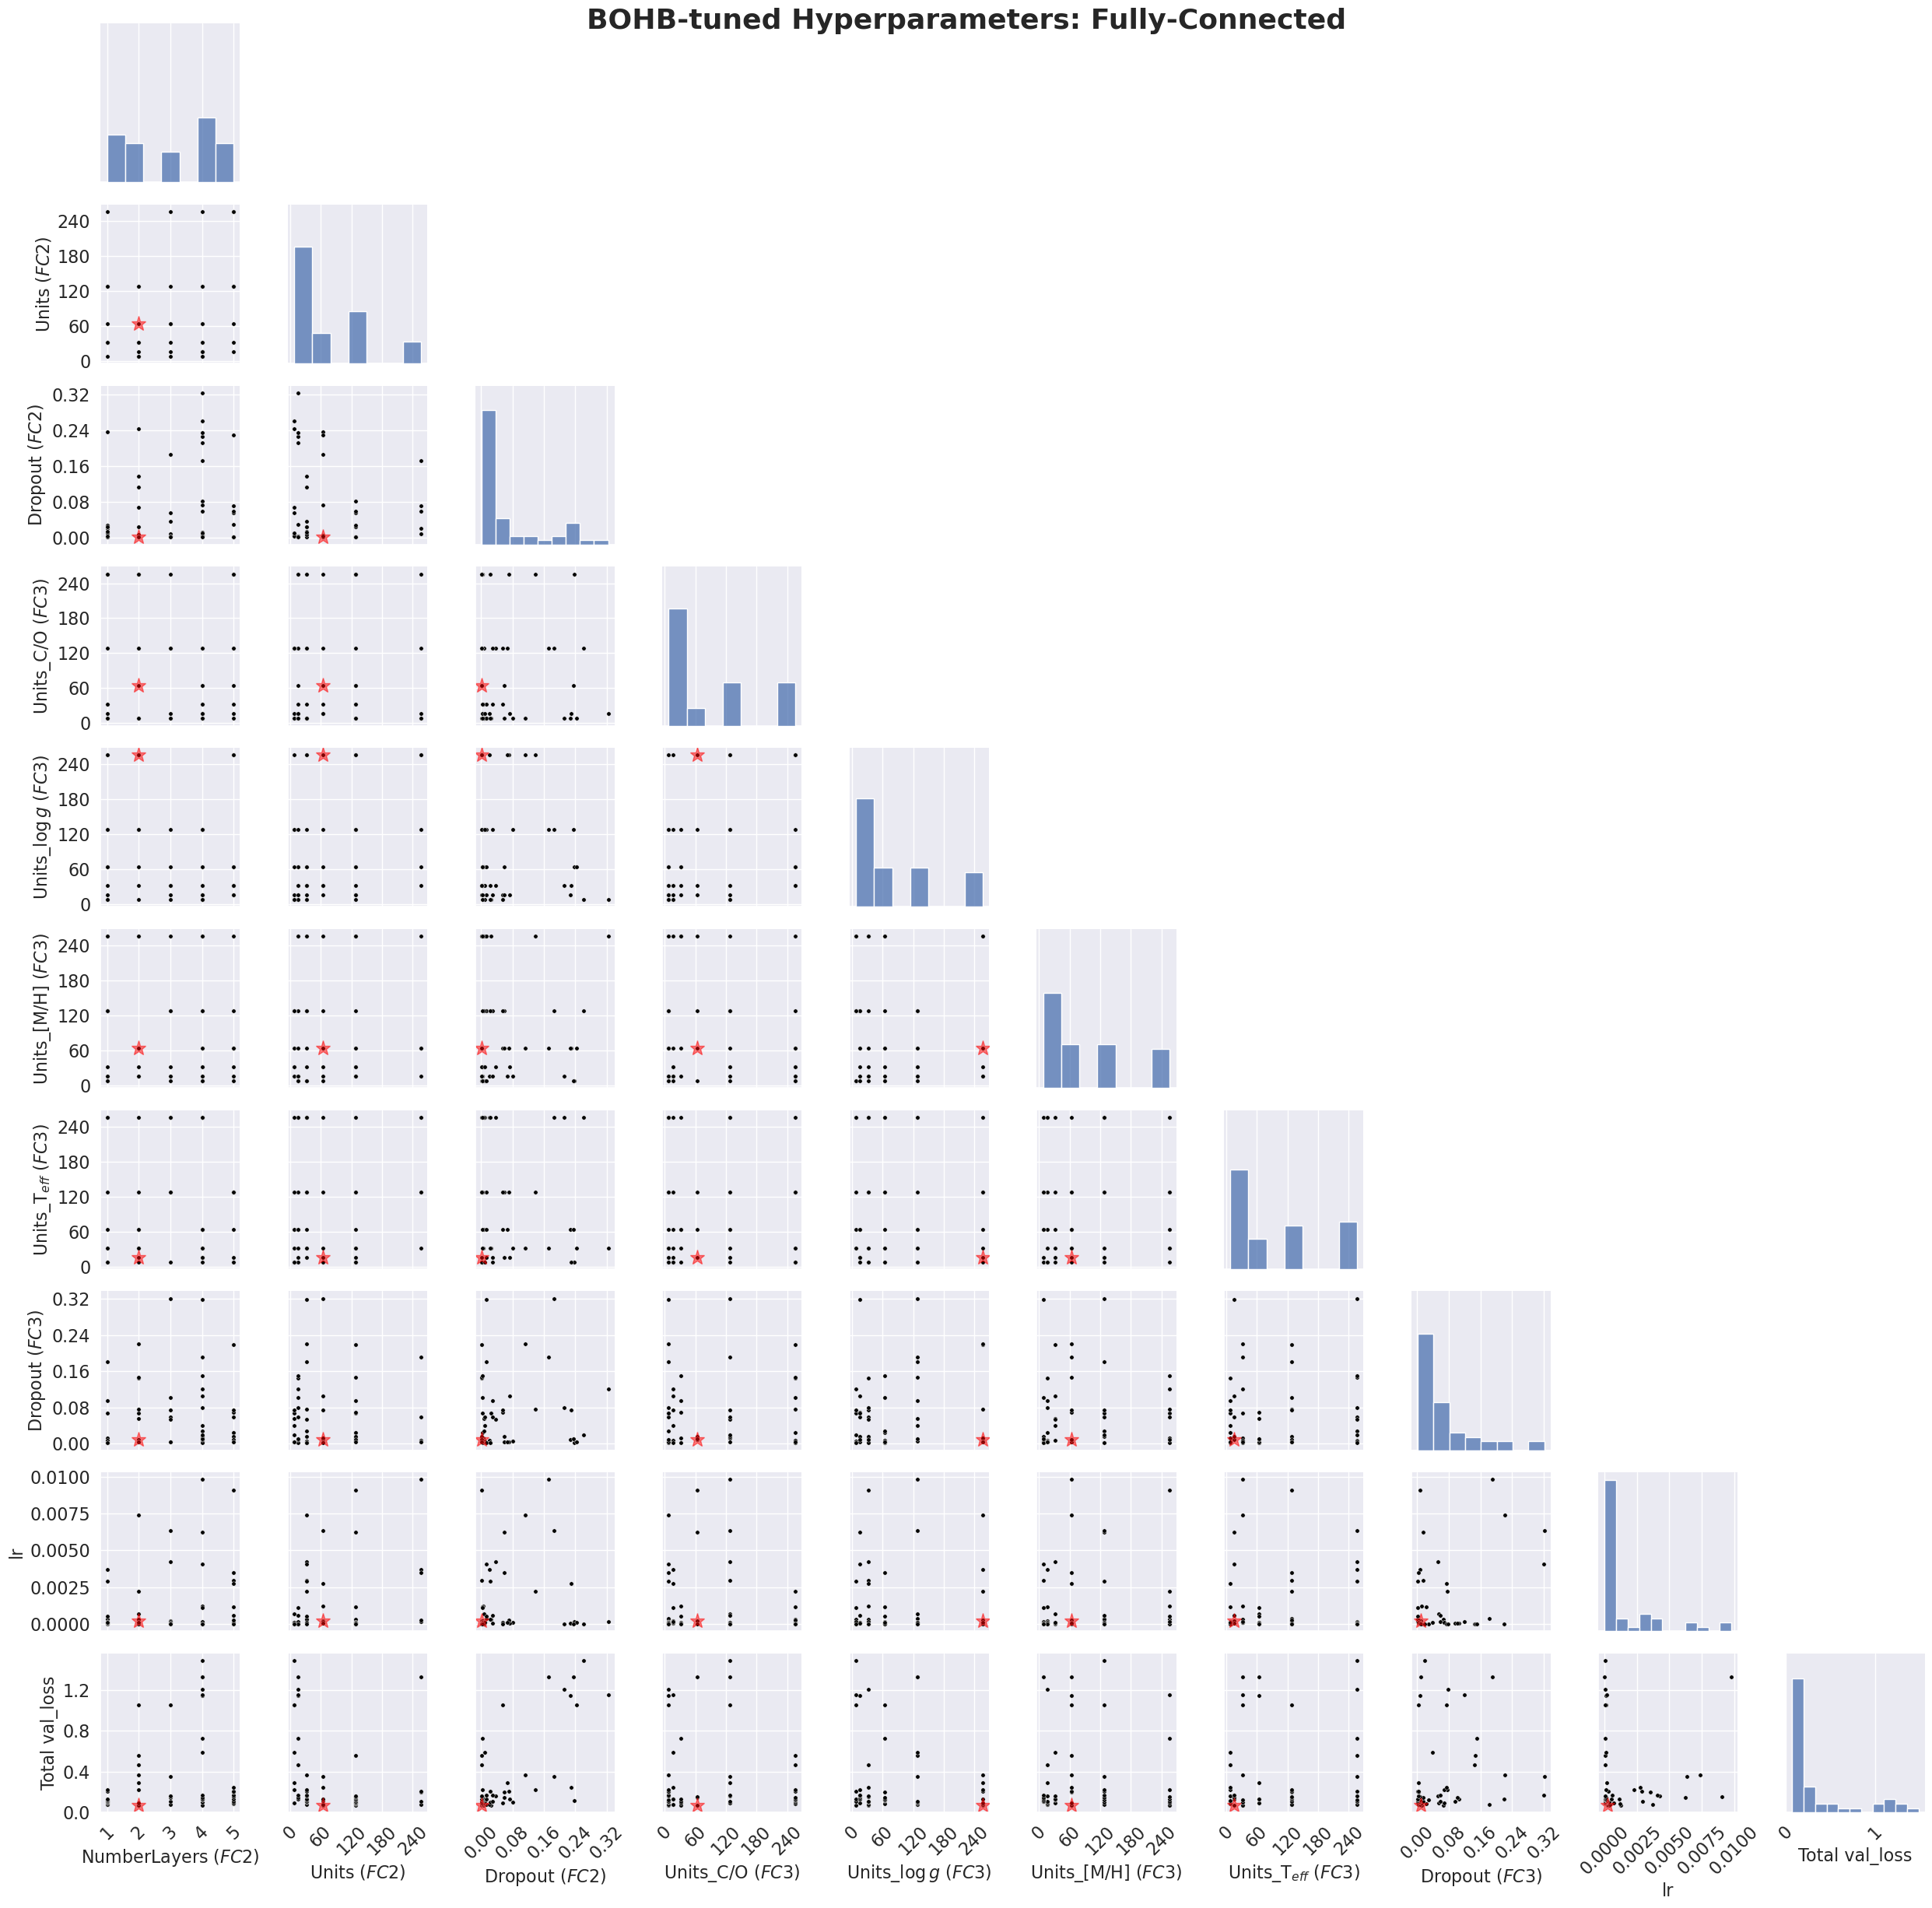

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
from matplotlib.patches import Rectangle

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
                # 'FC_in_Conv__units',
                # 'FC_in_Conv__dropout',
                ###
                'FC__NumberLayers',
                'FC__units', 
                'FC__dropout', 
                ###
                'FC__units_c_o_ratio',
                'FC__units_gravity', 
                'FC__units_metallicity', 
                'FC__units_temperature',
                'FC_out_dropout',
                # # ###
                'lr',
                # ###
                'val_loss']]

# display(data)
# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
# Customize the x-axis tick labels for each subplot
labels = [
            # # ###
            # 'Units ($FC1$)',
            # 'Dropout ($FC1$)',
            ###
            'NumberLayers ($FC2$)',
            'Units ($FC2$)', 
            'Dropout ($FC2$)', 
            ###
            'Units_C/O ($FC3$)',
            'Units_$\log g$ ($FC3$)', 
            'Units_[M/H] ($FC3$)', 
            'Units_T$_{eff}$ ($FC3$)',
            'Dropout ($FC3$)',
            # # ###
            'lr',
            # ###
            'Total val_loss'
        ]

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=16)
    g.axes[i, 0].set_ylabel(label, fontsize=16)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in ['FC__units', 'FC__units_c_o_ratio']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator([4,8,16,32,64,128,256]))
                # g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=14, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Fully-Connected", fontweight='bold', fontsize=26)

# Set the size of the figure to 10 inches by 10 inches
# g.fig.set_size_inches(14, 14)
plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()
